In [1]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow

api_key = "362d2ce77ac1347c707f15a319677c99"

In [2]:
print("How much are you willing to spend in one day per person")
min_amount=input("Min amount")
max_amount=input("Max amount")

How much are you willing to spend in one day per person
Min amount100
Max amount200


In [7]:
area_int=input("Please enter the area of your interests(all,dining,shopping,museums,sports,spas):")
    
if area_int== "all":
    int_type=input("Please enter place type (hotel,amusement_park,bar,cafe,casino,museum,night_club,restaurant,shopping_mall,spa,stadium,zoo): ")
elif area_int== "dining":
    int_type=input("Please enter place type (bar,cafe,casino,night_club,restaurant): ")
elif area_int== "shopping":
    int_type=input("Please enter place type (shopping_mall): ")
elif area_int== "museums":
    int_type=input("Please enter place type (museums,zoo): ")
elif area_int=="sports":
    int_type=input("Please enter place type (amusement_park,stadium): ")
elif area_int=="spas":
    int_type=input("Please enter place type (spas): ")  
    
#     put error handling for if user enter invalid data 

Please enter the area of your interests(all,dining,shopping,museums,sports,spas):dining
Please enter place type (bar,cafe,casino,night_club,restaurant): bar


In [12]:
city_interest = pd.read_csv("Output/city_interest_rating_summary.csv")
city_interest=city_interest.sort_values(by=['city_sort','Average of Ratings','Total Rating Counts'], ascending=False)
city_interest.head()

    

,Total Rating Counts,Average of Ratings,city_sort,interest_sort
1357,1,4.80,"Zion National Park, UT",night_club
1351,4,4.78,"Zion National Park, UT",amusement_park
1360,5,4.72,"Zion National Park, UT",spa
1355,20,4.56,"Zion National Park, UT",hotel
1356,1,4.50,"Zion National Park, UT",museum


In [35]:
city=[]
rating=[]
count=[]
for index,row in city_interest.iterrows():
        if(int_type==row[3]):
                city.append(row[2])
                rating.append(row[1])
                count.append(row[0])

In [41]:
final_interest_df=pd.DataFrame({"CityState": city,"Rating": rating,"Count" : count})


In [42]:
city_temp_cost = pd.read_csv("CSV_Data_Files/CityTravelCost.csv")
interest_cost_merge=pd.merge(final_interest_df,city_temp_cost,on='CityState',how='inner')
interest_cost_merge.head()

,CityState,Rating,Count,City,State,Average Daily Cost per person,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Zion National Park, UT",4.31,20,Zion National Park,UT,95,NaN,NaN,NaN
1,"Yosemite National Park, CA",3.62,5,Yosemite National Park,CA,104,NaN,NaN,NaN
2,"Yellow Stone National Park, WY",3.77,20,Yellow Stone National Park,WY,89,NaN,NaN,NaN
3,"Williamsburg, VA",4.23,20,Williamsburg,VA,90,NaN,NaN,NaN
4,"Virginia Beach, VA",4.40,20,Virginia Beach,VA,60,NaN,NaN,NaN


In [60]:
# city_temp_cost = pd.read_csv("CSV_Data_Files/CityTravelCost.csv")
cityState=[]
amount=[]
count=[]
rating=[]
for index, row in interest_cost_merge.iterrows():
    if((int(row[5]) >= int(min_amount)) and (int(row[5]) <= int(max_amount))):
        cityState.append(row[0])
        amount.append(row[5])
        count.append(row[2])
        rating.append(row[1])


In [61]:
city_travel_df = pd.DataFrame({
    'CityState': cityState,
    'AvgAmt': amount,
    'Cnt': count,
    'Rating':rating
    },index=cityState)

if(len(city_travel_df) < 1):
    print("Please Broaden your search Criterea")
city_travel_df=city_travel_df.nlargest(5, ['Rating','Cnt'],keep='first')

In [62]:
settings = {"units": "metric", "appid": api_key}

In [64]:
# Get data for each city in cities.csv
weather_data = []
summary = ["name", "main.temp"]
weather_df = pd.DataFrame()
for index,row in city_travel_df.iterrows():
    try:
        cityName=row[0].split(',')
        weather_data=ow.get_current(cityName[0], **settings)
        data = weather_data(*summary)
        weather_df=weather_df.append({'State/Cities': data[0], 'Current Temp': data[1]}, ignore_index=True)
    except:
        print("record not found " + row[0] )

In [65]:
weather_df

,Current Temp,State/Cities
0,15.10,Portland
1,20.54,Asheville
2,27.04,Charleston
3,23.11,Cincinnati
4,21.84,Chicago


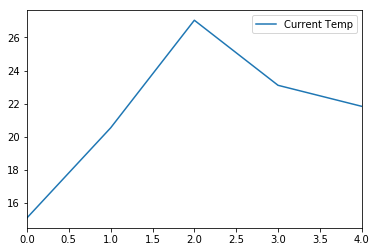

In [66]:
lines = weather_df.plot.line()